##Importing Modules

In [ ]:
# Importing Modules

import pandas as pd
import numpy as np

# Modules for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modules for Preprocessing and Model Training 
from scipy import stats
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Importing modules for Balacing the DataSet
from imblearn.over_sampling import SMOTE

In [ ]:
Log_reg = LogisticRegression(solver = 'liblinear')
rfc = RandomForestClassifier(n_estimators=100,random_state = 0)
dtc = DecisionTreeClassifier(random_state = 0)

In [ ]:
# Importing the Dataset
df = pd.read_csv("/content/drive/MyDrive/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Checking Shape of the Data
print("Rows x Columns : {} x {}".format(df.shape[0], df.shape[1]))
print()
df.info()

Rows x Columns : 6497 x 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Data Preprocessing (Handling Null Values)

In [ ]:
# Checking For Null or Nan Values in Testing Dataset for removing them 
total = df.count().sort_values(ascending=True)
missing = df.isnull().sum().sort_values(ascending=True)

missing_data = pd.concat([total,missing],axis = 1 , keys = ["Total","Missing Values"])
missing_data.head(20)

,Total,Missing Values
fixed acidity,6487,10
pH,6488,9
volatile acidity,6489,8
sulphates,6493,4
citric acid,6494,3
residual sugar,6495,2
chlorides,6495,2
type,6497,0
free sulfur dioxide,6497,0
total sulfur dioxide,6497,0


In [ ]:
# List of Columns having null values 
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'pH', 'sulphates']
# Replacing Null Values by the mean of the population
for col in cols :
  df[col] = df[col].fillna(df[col].dropna().mean())

# Checking the Null for Conformation 
total = df.count().sort_values(ascending=True)
missing = df.isnull().sum().sort_values(ascending=True)

missing_data = pd.concat([total,missing],axis = 1 , keys = ["Total","Missing Values"])
missing_data.head(20)

,Total,Missing Values
type,6497,0
fixed acidity,6497,0
volatile acidity,6497,0
citric acid,6497,0
residual sugar,6497,0
chlorides,6497,0
free sulfur dioxide,6497,0
total sulfur dioxide,6497,0
density,6497,0
pH,6497,0


In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


white    4898
red      1599
Name: type, dtype: int64

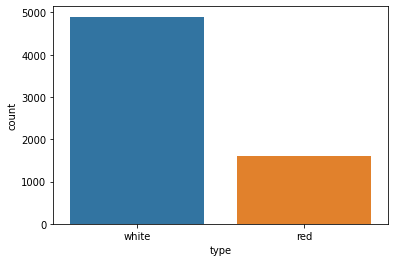

In [ ]:
# Plotting the type of Wines present in the Dataset
sns.countplot(df['type'])

df['type'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

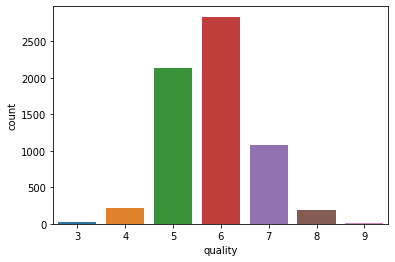

In [ ]:
# Checking the No. of Wines of each quality
sns.countplot(df['quality'])

df['quality'].value_counts()

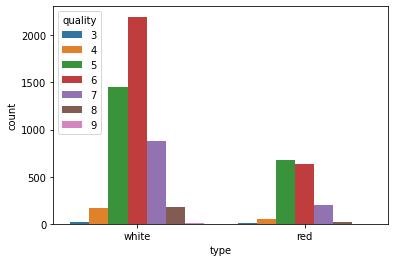

In [ ]:
# Checking the No. of Each type of wine of every Quality
sns.countplot(x="type", hue="quality", data=df)

### Detecting Outliers 

In [ ]:
# Used df.describe to Understand the Data and getting the Glimpse of Outliers 

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# Since the Dataset is Unbalanced with respect to Quality of Wine So We grouped the Data in Two Groups
# 1 for the Quality Score > 6 and 0 for Quality Score <= 6

df["wine_quality"] = [1 if x>6 else 0 for x in df.quality]
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [ ]:
# Since the Column id of Object type we will convert it into Interger Type By Assigning 1 and 0 to Wine Types 
df = pd.get_dummies(df, drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [ ]:
df = df.rename(columns={"type_white": "wine_type"})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [ ]:
# Applying Z-Score for Handling Outliers

z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape

(5989, 14)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality,wine_type
count,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000
mean,7.094660,0.326472,0.312820,5.505291,0.051618,30.728085,118.039239,0.994503,3.218214,0.519445,10.507619,5.844548,0.202204,0.786776
std,1.046806,0.145988,0.133311,4.649364,0.021014,16.366145,54.377845,0.002864,0.154365,0.127193,1.195030,0.848618,0.401677,0.409619
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.400000,4.000000,0.000000,0.000000
25%,6.400000,0.220000,0.250000,1.800000,0.037000,18.000000,84.000000,0.992160,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,6.900000,0.290000,0.310000,3.200000,0.046000,29.000000,120.000000,0.994700,3.210000,0.500000,10.300000,6.000000,0.000000,1.000000
75%,7.600000,0.390000,0.380000,8.200000,0.060000,42.000000,156.000000,0.996800,3.320000,0.590000,11.300000,6.000000,0.000000,1.000000
max,11.100000,0.830000,0.740000,19.500000,0.161000,83.000000,282.000000,1.002600,3.700000,0.970000,14.050000,8.000000,1.000000,1.000000


## Data Visualization

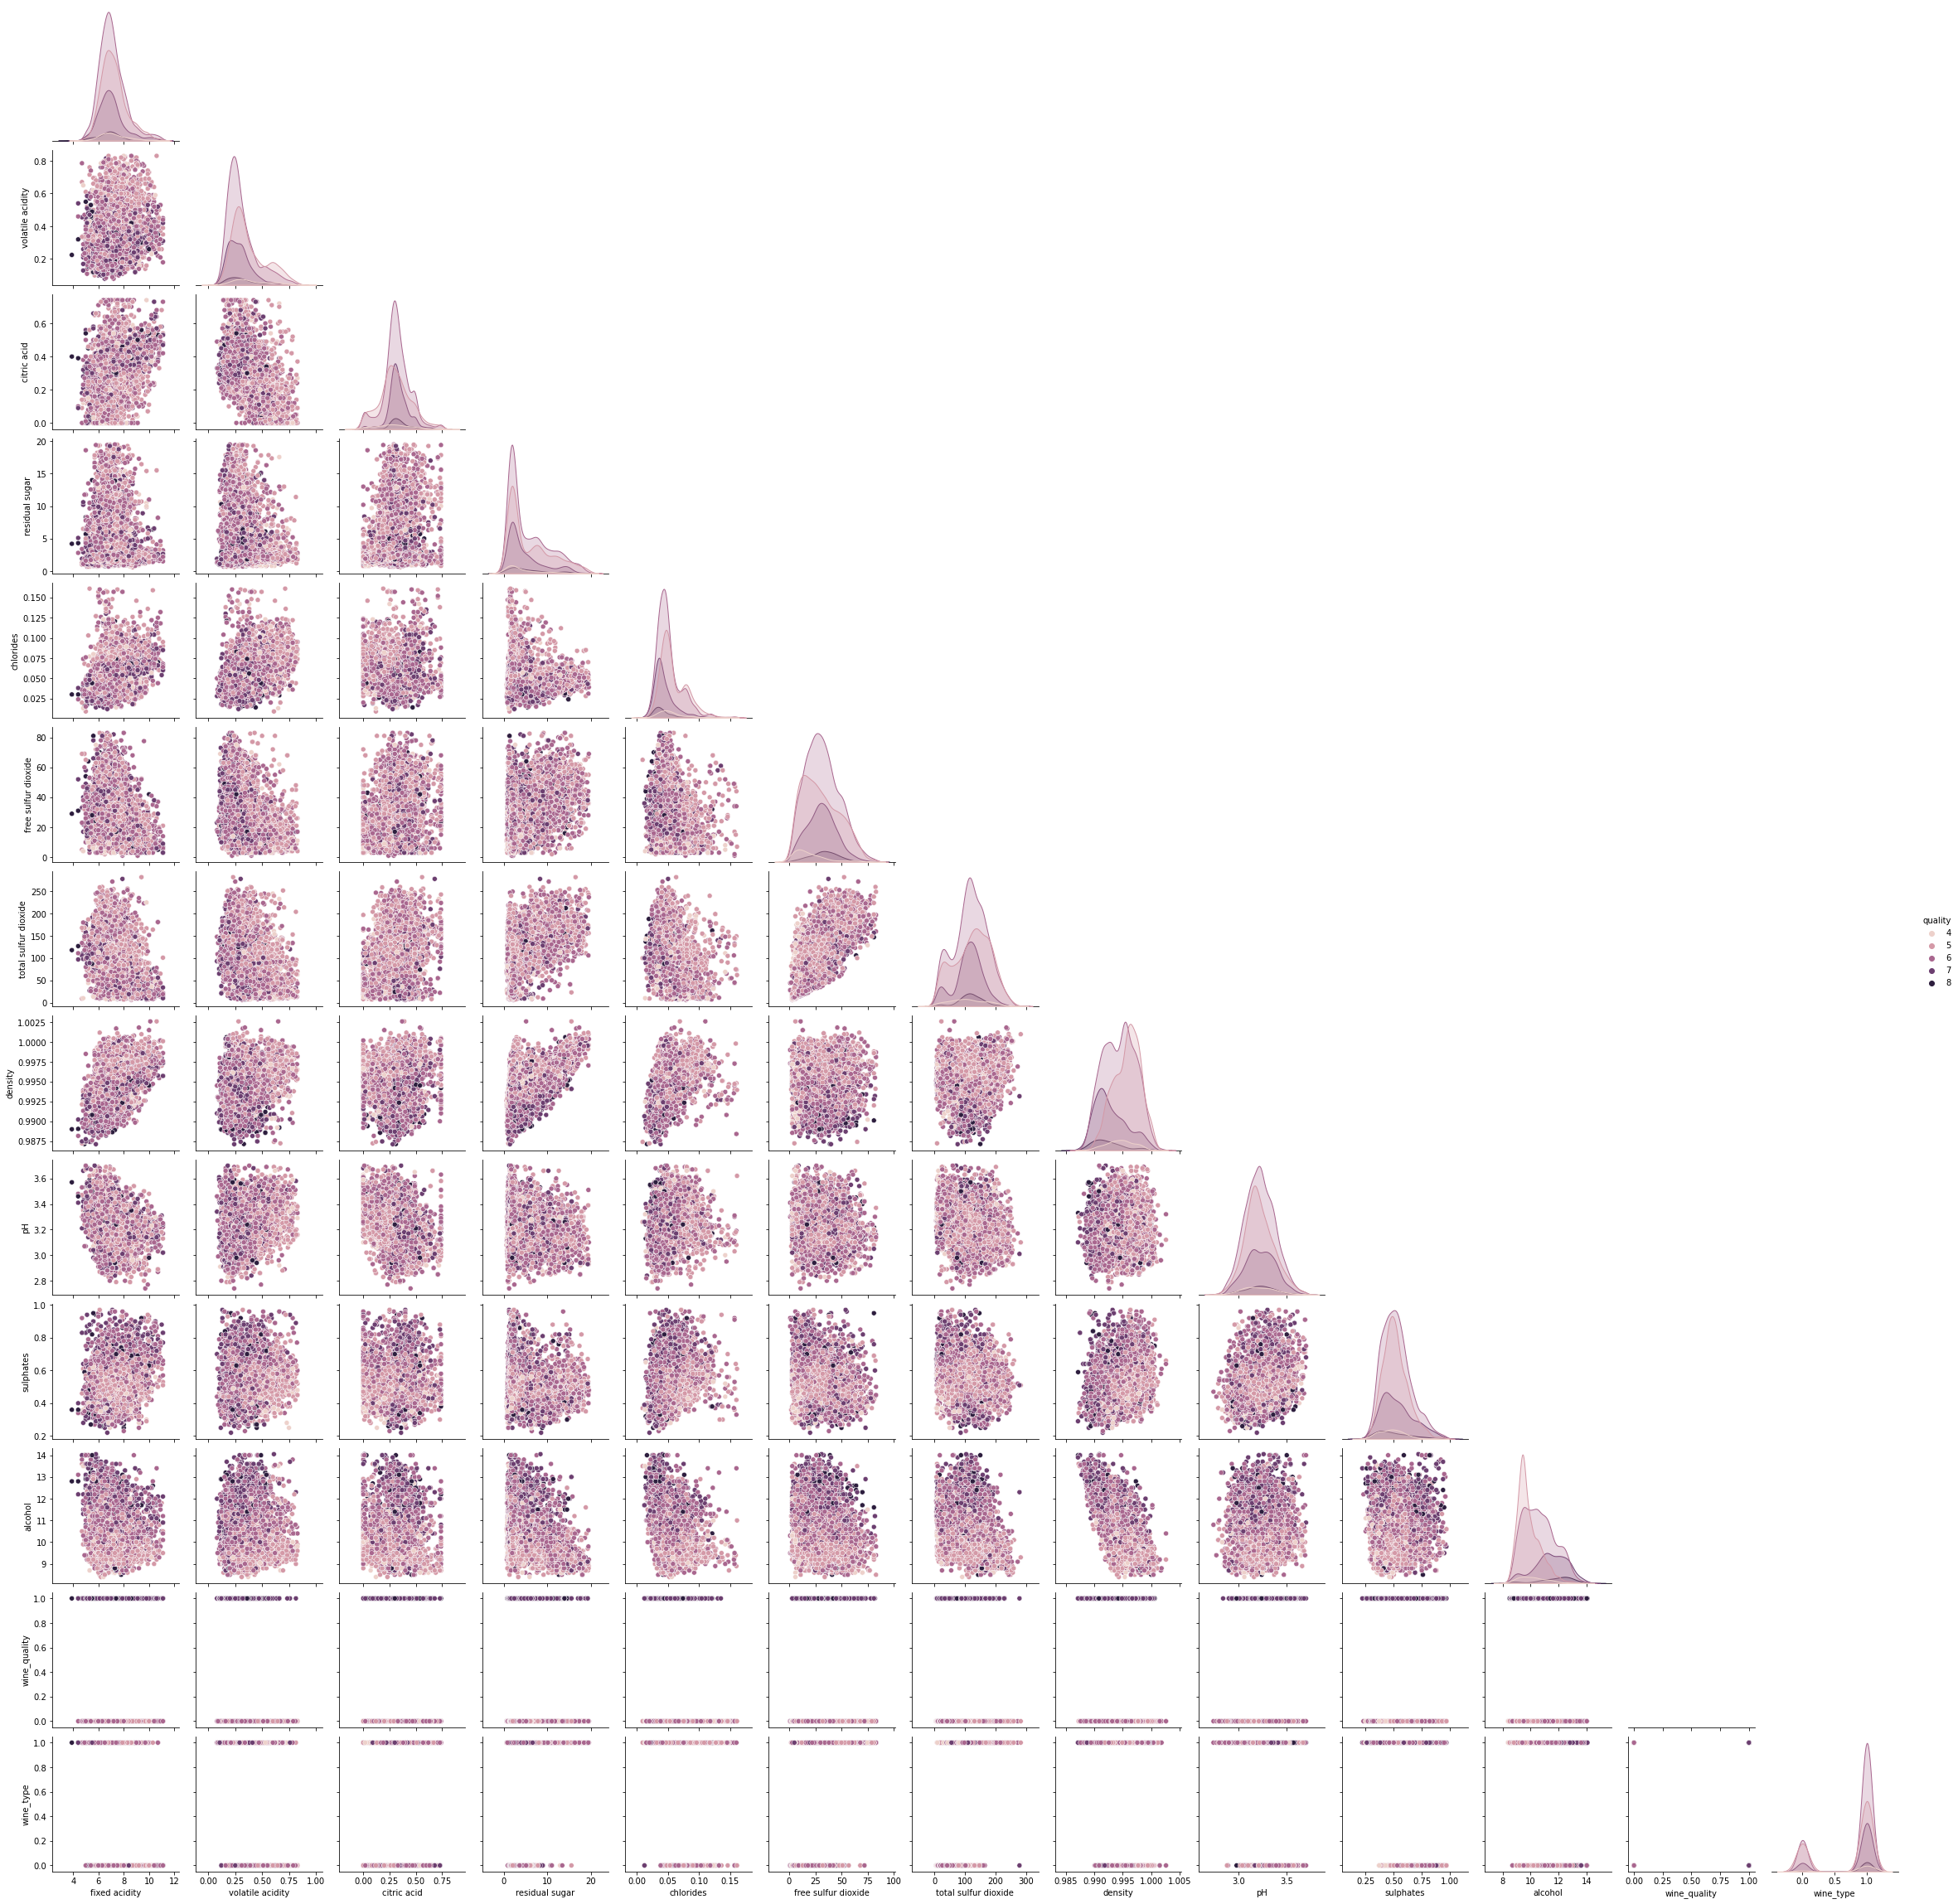

In [ ]:
sns.pairplot(df, hue='quality', corner=True)

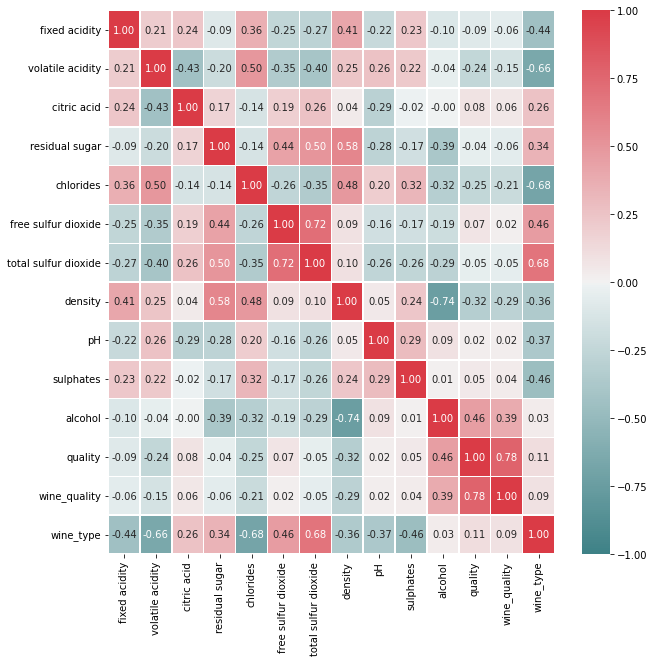

In [ ]:
corr = df.corr()

plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True), vmin=-1, vmax=1, linewidths=.5, fmt=".2f")

In [ ]:
# Finding the Features which are highly co-related

for a in range(len(df.corr().columns)):
    for b in range(a):
        if df.corr().iloc[a,b] >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide
wine_quality


In [ ]:
# As the 'Total Sulphur Dioxide is having the coorelation of > 0.7
# Therefore,  we Will remove it from Dataset

new_df=df.drop('total sulfur dioxide',axis=1)
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality,wine_type
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,0,1
5,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,0,1


In [ ]:
# Defining the Features and Target

# Define target y
y = np.asarray(new_df['wine_quality'])
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Define features X
new_df2 = new_df.drop(['wine_quality','quality'],axis=1)
X = np.asarray(new_df2.iloc[:,:])
X

array([[ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  1.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  1.   ],
       [ 7.2  ,  0.23 ,  0.32 , ...,  0.4  ,  9.9  ,  1.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  0.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  0.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  0.   ]])

In [ ]:
# StanderDizing the Dataset Using MinMaxScaler
Scaler = MinMaxScaler()
fit = Scaler.fit(X)
transform = Scaler.transform(X)
X

array([[ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  1.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  1.   ],
       [ 7.2  ,  0.23 ,  0.32 , ...,  0.4  ,  9.9  ,  1.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  0.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  0.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  0.   ]])

In [ ]:
# Splitting the Dataset into Training and Testing Data of Unbalanced DataSet
X_train_ub, X_test_ub, y_train_ub, y_test_ub = train_test_split(X,y, random_state = 42, test_size = 0.2)

print ('Train set:', X_train_ub.shape, y_train_ub.shape)
print ('Test set:', X_test_ub.shape, y_test_ub.shape)

Train set: (4791, 11) (4791,)
Test set: (1198, 11) (1198,)


# Applying Models on UnBalanced Datset

####Logistic Regression

In [ ]:
Log_reg.fit(X_train_ub, y_train_ub)

y_pred_ub = Log_reg.predict(X_test_ub)

Log_reg.score(X_train_ub, y_train_ub)

score = accuracy_score(y_test_ub, y_pred_ub)

cf = confusion_matrix(y_test_ub, y_pred_ub)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying Logistic Regression Model
c_matrix = [{'Model':'Logistic Regression','Type': 'Unbalanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]}]

In [ ]:
# Printing Classification Report of the Logistic Regression/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_ub, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.812     0.958     0.879       939
           1      0.562     0.193     0.287       259

    accuracy                          0.793      1198
   macro avg      0.687     0.576     0.583      1198
weighted avg      0.758     0.793     0.751      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log = [{"Model": "Logistic Regression","Type" : 'Unbalanced', "Accuracy": score}]

#### K-Nearest Neighbor

Text(0, 0.5, 'Cross-validated accuracy')

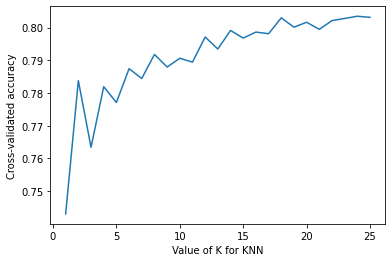

In [ ]:
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []

# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  # It’s 10 fold cross validation with ‘accuracy’ scoring 
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
  k_scores.append(scores.mean())
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [ ]:
# Choosing n_neighbours = 19 as it has highest Accuracy 
# Training KNN Model

knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train_ub, y_train_ub)

y_pred_ub = knn.predict(X_test_ub)

score = accuracy_score(y_test_ub, y_pred_ub)

cf = confusion_matrix(y_test_ub, y_pred_ub)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying KNN Model
c_matrix.append({'Model':'K-Nearest Neighbor','Type': 'Unbalanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]})

In [ ]:
# Printing Classification Report of the KNN/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_ub, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.820     0.955     0.882       939
           1      0.596     0.239     0.342       259

    accuracy                          0.801      1198
   macro avg      0.708     0.597     0.612      1198
weighted avg      0.772     0.801     0.766      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log.append({"Model": "K-Nearest Neighbor","Type" : 'Unbalanced', "Accuracy": score})

####Random Forest Classifier

In [ ]:
rfc.fit(X_train_ub, y_train_ub)

y_pred_ub = rfc.predict(X_test_ub)

score = accuracy_score(y_test_ub, y_pred_ub)

cf = confusion_matrix(y_test_ub, y_pred_ub)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying Random Forest Classifier Model
c_matrix.append({'Model':'Random Forest Classifier','Type': 'Unbalanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]})

In [ ]:
# Printing Classification Report of the Random Forest Calssifier/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_ub, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.888     0.965     0.925       939
           1      0.815     0.560     0.664       259

    accuracy                          0.877      1198
   macro avg      0.851     0.762     0.794      1198
weighted avg      0.872     0.877     0.868      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log.append({"Model": "Random Forest Classifier","Type" : 'Unbalanced', "Accuracy": score})

####Decision Tree Classifier

In [ ]:
dtc.fit(X_train_ub, y_train_ub)

y_pred_ub = dtc.predict(X_test_ub)

score = accuracy_score(y_test_ub, y_pred_ub)

cf = confusion_matrix(y_test_ub, y_pred_ub)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying Decision Tree Classifier Model
c_matrix.append({'Model':'Decision Tree Classifier','Type': 'Unbalanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]})

In [ ]:
# Printing Classification Report of the Decision Tree Calssifier/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_ub, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.896     0.912     0.904       939
           1      0.658     0.618     0.637       259

    accuracy                          0.848      1198
   macro avg      0.777     0.765     0.771      1198
weighted avg      0.845     0.848     0.846      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log.append({"Model": "Decision Tree Classifier","Type" : 'Unbalanced', "Accuracy": score})

###Model Evaluation And Comparision

In [ ]:
logs = pd.DataFrame(log)
Con_matrix = pd.DataFrame(c_matrix)

In [ ]:
logs.head()

,Model,Type,Accuracy
0,Logistic Regression,Unbalanced,0.792988
1,K-Nearest Neighbor,Unbalanced,0.800501
2,Random Forest Classifier,Unbalanced,0.877295
3,Decision Tree Classifier,Unbalanced,0.848080


In [ ]:
Con_mat.head()

,Model,Type,TP,FP,FN,TN
0,Logistic Regression,Unbalanced,900,39,1,50
1,K-Nearest Neighbor,Unbalanced,897,42,1,62
2,Random Forest Classifier,Unbalanced,906,33,1,145
3,Decision Tree Classifier,Unbalanced,856,83,1,160


##Balancing the Dataset Using SMOTE

In [ ]:
# Create SMOTE model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_train_bal, y_train_bal = sm.fit_resample(X_train_ub, y_train_ub.ravel())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


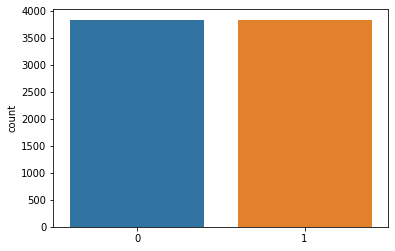

In [ ]:
# Checking the Count of each type of wine
sns.countplot(y_train_bal)

In [ ]:
# Checking the Shape Of the Dataset After Applying SMOTE

print ('Train set:', X_train_bal.shape, y_train_bal.shape)
print ('Test set:', X_test_ub.shape, y_test_ub.shape)

Train set: (7678, 11) (7678,)
Test set: (1198, 11) (1198,)


# Applying Models on Datset Balanced by Using SMOTE

####Logistic Regression

In [ ]:
Log_reg.fit(X_train_bal, y_train_bal)

y_pred_bal = Log_reg.predict(X_test_ub)

Log_reg.score(X_train_bal, y_train_bal)

score = accuracy_score(y_test_ub, y_pred_bal)

cf = confusion_matrix(y_test_ub, y_pred_bal)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying Logistic Regression Model
c_matrix = [{'Model':'Logistic Regression','Type': 'Balanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]}]

In [ ]:
# Printing Classification Report of the Logistic Regression/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_bal, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.904     0.723     0.804       939
           1      0.418     0.722     0.530       259

    accuracy                          0.723      1198
   macro avg      0.661     0.723     0.667      1198
weighted avg      0.799     0.723     0.744      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log = [{"Model": "Logistic Regression","Type" : 'Balanced', "Accuracy": score}]

#### K-Nearest Neighbor

Text(0, 0.5, 'Cross-validated accuracy')

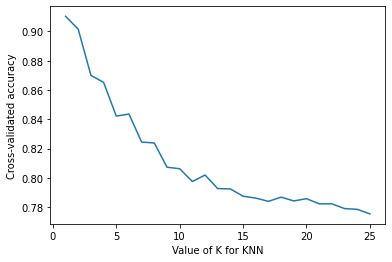

In [ ]:
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []

# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  # It’s 10 fold cross validation with ‘accuracy’ scoring 
  scores = cross_val_score(knn, X_train_bal, y_train_bal, cv=10, scoring='accuracy') 
  k_scores.append(scores.mean())
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [ ]:
# Choosing n_neighbours = 4 as it has highest Accuracy 
# Training KNN Model

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_bal, y_train_bal)

y_pred_bal = knn.predict(X_test_ub)

score = accuracy_score(y_test_ub, y_pred_bal)

cf = confusion_matrix(y_test_ub, y_pred_bal)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying KNN Model
c_matrix.append({'Model':'K-Nearest Neighbor','Type': 'Balanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]})

In [ ]:
# Printing Classification Report of the KNN/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_bal, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.900     0.819     0.858       939
           1      0.506     0.672     0.577       259

    accuracy                          0.787      1198
   macro avg      0.703     0.745     0.717      1198
weighted avg      0.815     0.787     0.797      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log.append({"Model": "K-Nearest Neighbor","Type" : 'Balanced', "Accuracy": score})

####Random Forest Classifier

In [ ]:
rfc.fit(X_train_bal, y_train_bal)

y_pred_bal = rfc.predict(X_test_ub)

score = accuracy_score(y_test_ub, y_pred_bal)

cf = confusion_matrix(y_test_ub, y_pred_bal)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying Random Forest Classifier Model
c_matrix.append({'Model':'Random Forest Classifier','Type': 'Balanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]})

In [ ]:
# Printing Classification Report of the Random Forest Calssifier/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_bal, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.927     0.902     0.914       939
           1      0.676     0.741     0.707       259

    accuracy                          0.867      1198
   macro avg      0.801     0.822     0.811      1198
weighted avg      0.873     0.867     0.869      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log.append({"Model": "Random Forest Classifier","Type" : 'Balanced', "Accuracy": score})

####Decision Tree Classifier

In [ ]:
dtc.fit(X_train_bal, y_train_bal)

y_pred_bal = dtc.predict(X_test_ub)

score = accuracy_score(y_test_ub, y_pred_bal)

cf = confusion_matrix(y_test_ub, y_pred_bal)

In [ ]:
# Confusion Matrix of Unbalanced Dataset After Applying Decision Tree Classifier Model
c_matrix.append({'Model':'Decision Tree Classifier','Type': 'Balanced','TP':cf[0][0],'FP':cf[0][1],'FN':[1][0],'TN':cf[1][1]})

In [ ]:
# Printing Classification Report of the Decision Tree Calssifier/ Unbalanced Dataset
print(classification_report(y_test_ub, y_pred_bal, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.911     0.857     0.883       939
           1      0.573     0.695     0.628       259

    accuracy                          0.822      1198
   macro avg      0.742     0.776     0.756      1198
weighted avg      0.838     0.822     0.828      1198



In [ ]:
# Appending Acuuracy Score for Comparitive Study to Logs

log.append({"Model": "Decision Tree Classifier","Type" : 'Balanced', "Accuracy": score})

###Model Evaluation And Comparision

In [ ]:
logs = pd.DataFrame(log)
Con_matrix = pd.DataFrame(c_matrix)

In [ ]:
logs.head()

,Model,Type,Accuracy
0,Logistic Regression,Balanced,0.722871
1,K-Nearest Neighbor,Balanced,0.787145
2,Random Forest Classifier,Balanced,0.867279
3,Decision Tree Classifier,Balanced,0.822204


In [ ]:
Con_matrix.head()

,Model,Type,TP,FP,FN,TN
0,Logistic Regression,Balanced,679,260,1,187
1,K-Nearest Neighbor,Balanced,769,170,1,174
2,Random Forest Classifier,Balanced,847,92,1,192
3,Decision Tree Classifier,Balanced,805,134,1,180
